In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv


# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)




Python version 2.7.16 |Anaconda, Inc.| (default, Sep 24 2019, 21:51:30) 
[GCC 7.3.0]
Pandas version 0.24.2
Matplotlib version 2.2.3


In [2]:
train = pd.read_csv("train.csv")

In [3]:
#game=list(zip(train.idF,train.priceF,train.room_typeF))
#df1=pd.DataFrame(data = game, columns=[ 'id','priceF','typeF'])
#
#game=list(zip(train.idM,train.priceM,train.room_typeM))
#df2=pd.DataFrame(data = game, columns=[ 'id','priceM','typeM'])

#game=list(zip(train.idA,train.priceA,train.room_typeA))
#df3=pd.DataFrame(data = game, columns=[ 'id','priceA','typeA'])
#df4=pd.merge(df1, df2,how='outer')

#df4=pd.merge(df4, df3,how='outer')



In [14]:
#create list and array with price and room_type in february
test=list(zip(train.priceF,train.room_typeF))
df1= pd.DataFrame(data = test, columns=['priceF','room_typeF'])

#remove the $ from price
timi=df1.priceF.replace('\D', '', regex=True).astype(int)
timi=timi/100


#create list and array with timi and room_type in february
test=list(zip(timi,train.room_typeF))
df1= pd.DataFrame(data = test, columns=['priceF','room_typeF'])


#create list and array with price and room_type in march
test=list(zip(train.priceM,train.room_typeM))
df2 = pd.DataFrame(data = test, columns=['priceM','room_typeM'])

#remove the $ from price
timi=df2.priceM.replace('\D', '', regex=True).astype(int)
timi=timi/100


#create list and array with timi and room_type in march
test=list(zip(timi,train.room_typeM))
df2 = pd.DataFrame(data = test, columns=['priceM','room_typeM'])


#create list and array with price and room_type in april
test=list(zip(train.priceA,train.room_typeA))
df3 = pd.DataFrame(data = test, columns=['priceA','room_typeA'])

#remove the $ from price
timi=df3.priceA.replace('\D', '', regex=True).astype(int)
timi=timi/100

#create list and array with timi and room_type in appril
test=list(zip(timi,train.room_typeA))
df3 = pd.DataFrame(data = test, columns=['priceA','room_typeA'])


In [15]:
#find the average price for every month
df1 = pd.DataFrame(data = df1.groupby(['room_typeF']).mean())
df2 = pd.DataFrame(data = df2.groupby(['room_typeM']).mean())
df3 = pd.DataFrame(data = df3.groupby(['room_typeA']).mean())


In [18]:
#do array again
d_1=df1.reset_index()
d_2=df2.reset_index()
d_3=df3.reset_index()


In [20]:
#rename the column
d_2=d_2.rename(columns={"room_typeM":"room_typeF","priceM":"priceF"})
d_3=d_3.rename(columns={"room_typeA":"room_typeF","priceA":"priceF"})

#kartesiano
df_row = pd.concat([d_1,d_2,d_3])


In [23]:
#sum the three month average price in order to have the final result
dall = pd.DataFrame(data = df_row.groupby(['room_typeF']).sum())

In [24]:
dall

,priceF
room_typeF,
Entire home/apt,188.861524
Private room,250.891129
Shared room,106.720204


The reservations per month (every day is one reservation)


,priceF
room_typeF,
Private room,250.891129
Entire home/apt,188.861524
Shared room,106.720204


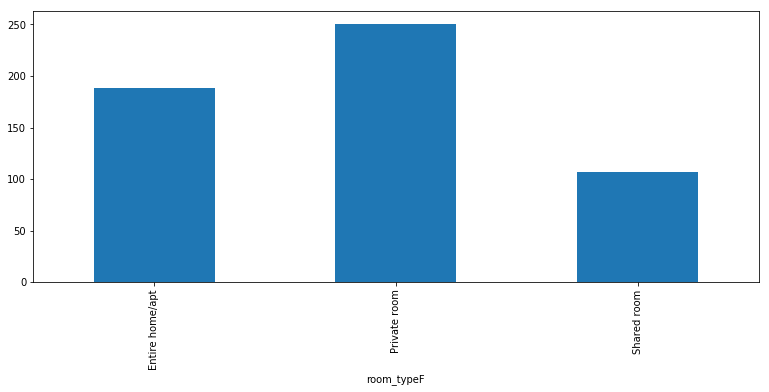

In [25]:
#diagram with price for every room_type
dall['priceF'].plot.bar(figsize=(13, 5))

print("The reservations per month (every day is one reservation)")


dall.sort_values(by='priceF', ascending=False)